# Проект: вариант 2

## Задание 1. A/B–тестирование

**1.1 Условие**

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

**1.2 Входные данные**

В качестве входных данных Вы имеете 4 csv-файла:
groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

**1.3 Вопросы**
**Предлагаем Вам ответить на следующие вопросы:**    
 * На какие метрики Вы смотрите в ходе анализа и почему?  
 * Имеются ли различия в показателях и с чем они могут быть связаны?  
 * Являются ли эти различия статистически значимыми?  
 * Стоит ли запускать новую механику на всех пользователей?*  
 Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

**1.4 Требования к ответу**
*При выполнении тестового задания необходимо использовать язык программирования Python. 
*В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
*Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.*

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

import numpy as np
import scipy.stats as ss
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm

%matplotlib inline
sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [2]:
# Считываем файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе
# (А – контроль, B – целевая группа), используем разделитель ";" 
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-bystrova/Final_Project/Проект_2_groups.csv'
users_grouped = pd.read_csv(path_to_file, encoding = 'Windows-1251', sep = ';')
users_grouped

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [3]:
# Считываем дополнительный файл с пользователями, который нам прислали спустя 2 дня после передачи данных
# используем разделитель ","
path_to_file_1 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-bystrova/Final_Project/Проект_2_group_add.csv'
users_grouped_add = pd.read_csv(path_to_file_1, encoding = 'Windows-1251', sep = ',')
users_grouped_add

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [4]:
# Считываем файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
path_to_file_2 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-bystrova/Final_Project/Проект_2_active_studs.csv'
users_visited = pd.read_csv(path_to_file_2)
users_visited

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [5]:
# Считываем файл с информацией об оплатах пользователей в дни проведения эксперимента, используем разделитель ";"
path_to_file_3 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-bystrova/Final_Project/Проект_2_checks.csv'
users_payed = pd.read_csv(path_to_file_3, encoding = 'Windows-1251', sep = ';')
users_payed

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


***Предполагаю, что нам необходимо объединить наши базы о принадлежности пользователя к контрольной или экспериментальной 
группе, т.е. объединить основной и дополнительный файлы. Но сначала необходимо убедиться, что в этих базах только уникальные id, и аналогичный тип данных.***

In [6]:
# Проверяем типы данных наших баз

In [7]:
users_grouped.dtypes

id      int64
grp    object
dtype: object

In [8]:
users_grouped_add.dtypes

id      int64
grp    object
dtype: object

In [9]:
# Функция по поиску дубликатов:
def isHasDublicates(table, colName = 'id'):
    return table.duplicated([colName]).sum() > 0

In [10]:
isHasDublicates(users_grouped)

False

In [11]:
isHasDublicates(users_grouped_add)

False

In [12]:
# Функция, комбинирующая таблицы 
def concat_tables(t1, t2):
    if (isHasDublicates(t1)):
        # Удалить дубликаты по колонке 'id'
        combined_df = t1.drop_duplicates(subset='id')
    
    if (isHasDublicates(t2)):
        # Удалить дубликаты по колонке 'id'
        combined_df = t2.drop_duplicates(subset='id')

    combined_df = pd.concat([t1, t2], ignore_index=True)
    
    if (isHasDublicates(combined_df)):
        # Удалить дубликаты по колонке 'id'
        combined_df = combined_df.drop_duplicates(subset='id')
    
    return combined_df

**Исходя из предложенных исходных файлов, я буду исследовать следующие метрики:**    
- ***Выручка*** 
- ***Средний чек***   
- ***Конверсия***

***Предположим, что id в нашей общей базе эксперемента равняется значениям student_id в базах пользователей,
которые зашли на платформу в дни проведения эксперимента и произвели оплаты. 
Чтобы в дальнейшем проверить метрики конверсии, среднего чека и выручки нам необходимо будет объеденить наши базы,
а для этого, чтобы информация соотнеслась верно, нам нужно чтобы в базах была колонка с общим именем и нужными нам данными.***

In [13]:
#Создадим функцию, которая мержит все датафреймы и возвращает датафрейм, в котором есть только зашедшие во время эксперимента,
#а также добавляются колонки с группой и информацией об оплате
def merge_dfs(users_grouped, users_visited, users_payed): 
    #Объединим базу посетивших эксперимент с базой оплаты, чтобы добавить колонку rev с данными об оплате
    #(либо Null, если отсутствует оплата)
    #Так как в users_payed есть еще какие-то посетители сайта совершившие оплаты во время проведения эксперимента,
    # но не попавшие в таблицу users_visited, будем использовать флаг how='outer'
    users_all_visited = pd.merge(users_visited, users_payed, on='student_id', how='outer')
    
    #Переименуем id в student_id, чтобы базу с разделением по группам можно было сливать с остальными данными
    users_grouped_renamed = users_grouped.rename(columns={'id': 'student_id'})

    #Объединим базы, чтобы получить только тех, которые зашли во время эксперимента и с указанием группы
    users_all_visited_with_groups = pd.merge(users_grouped_renamed, users_all_visited)

    # Проверяем смерженную таблицу на дубликаты
    if (isHasDublicates(users_all_visited_with_groups, 'student_id')):
        print(f'There are dublicates in result_df table')
        users_all_visited_with_groups = users_all_visited_with_groups.drop_duplicates(subset='student_id')
    
    return users_all_visited_with_groups
    

#Напишим функцию для расчета и вывода на печать всех наших метрик (выручки, конверсии и среднего чека):
def get_metrics(df):
    # Находим общее количество студентов, участвовавших в эксперименте
    all_users_count = df.count()[0]
    print(f'all_users_count', all_users_count )
        
    # В нашем объединенном датафрэйме в  столбце rev обнаружено значение NaN, поэтому мы для удобства, отфильтруем данные,
    # и оставим только тех, кто оплатил в течении нашего эксперимента:
    # Находим количество студентов, которые оплатили
    only_payed_users_count = df.dropna().count()[0]
    print(f'only_payed_users_count', only_payed_users_count )

    # Считаем общую выручку    
    revenue = df.rev.sum().round(2)
    print(f'Revenue is', revenue)
    
    # Считаем конверсию:
    cr = round((only_payed_users_count / all_users_count * 100), 2)
    print(f'CR is', cr)
    
    # Для расчёта среднего чека по данным о выручке и конверсии сайта можно использовать следующую формулу:
    # Средний чек = Выручка / Количество покупок/покупателей
    # Эта метрика помогает понять, сколько в среднем денег тратит каждый клиент при совершении покупки.

    # Считаем средний чек:
    avr_check = revenue / only_payed_users_count
    print(f'Average check is', avr_check)
    
    return {
        'revenue': revenue,
        'cr': cr,
        'avr_check': avr_check
    }
    

#Создадим переменную, в которой будем хранить актуальную таблицу с разбивкой по группой (потом мы собираемся ее обновлять в 3 задании)
users_grouped_actual = concat_tables(users_grouped, users_grouped_add)
merged_df = merge_dfs(users_grouped_actual, users_visited, users_payed)

metrics = get_metrics(merged_df)
metrics

all_users_count 8490
only_payed_users_count 541
Revenue is 573326.0
CR is 6.37
Average check is 1059.7523105360444


{'revenue': 573326.0, 'cr': 6.37, 'avr_check': 1059.7523105360444}

**На данном этапе анализа у нас есть данные, в том числе о посетителях совершивших оплаты в день посещения эксперимента, но не попавшие в активную группу, т.е. контрольную, либо тестовую, это может свидетельствовать о том, что возможно у нас присутствует:**  
***- автоматическое списание подписки на нашем сайте, и есть клиенты, которые ее подключили, но не заходили на наш сайт в дни эксперимента,***     
***- либо у нас не совсем корректно разнесли посетителей по группам в дни проведения эксперимента.***

**Увидеть количество неучтенных оплативших посетителей, можно объединив два датафрэйма: users_visited, users_payed  в датафрэйм users_not_all_visited и сравнить с общим получившимся датафрэймом users_all_visited**

In [14]:
users_not_all_visited = pd.merge(users_visited, users_payed, on='student_id')
users_not_all_visited

,student_id,rev
0,1184303,1530.0000
1,3354191,1900.0001
2,3278734,1900.0000
3,720651,1980.0000
4,1232221,1900.0000
...,...,...
387,3890326,199.0000
388,1390994,398.0000
389,1516339,290.0000
390,3910596,597.0000


In [15]:
# Находим общее количество оплативших пользователей в дни эксперимента:
users_all_visited = pd.merge(users_visited, users_payed, on='student_id', how='outer')
users_all_visited
only_payed_users_count_all = users_all_visited.dropna().count()[0]
only_payed_users_count_all

541

In [16]:
# Находим количество оплативших посетителей, которые не включены в наш эксперимент
541-392

149

In [17]:
 # Считаем общую выручку, чтобы понять о какой неучтенной сумме может идти речь:
revenue_users_all_visited = users_all_visited.rev.sum().round(2)
revenue_users_not_all_visited = users_not_all_visited.rev.sum().round(2)
income_difference = revenue_users_all_visited - revenue_users_not_all_visited
print(f'Revenue of all paid users', revenue_users_all_visited)
print(f'Revenue of users participating in the experiment', revenue_users_not_all_visited)
print(f'The difference in income between all users and participants in the experiment', income_difference)

Revenue of all paid users 573326.0
Revenue of users participating in the experiment 467794.0
The difference in income between all users and participants in the experiment 105532.0


In [18]:
# Проверим общее количество активных пользователей разнесенных по группам:
users_all_visited.shape

(8490, 2)

### Чтобы прийти к какому-либо выводу, по поводу успешности, либо неуспешности нашего эксперимента, нам  необходимо рассчитать и  сравнить результат наших метрик за время эксперимента  в тестовой и контрольной группах

### Разделим наши данных на две выборки: A и B, где значия в группе "group_a" соответствует данным контрольной группы,     
### а значия в группе "group_b" соответствует данным тестовой группы в нашем эксперименте,    
### - а заодно проверим по количеству пользователей которые отнесутся к той или иной группе нашу теорию о том, что при проведении эксперимента и выгрузке данных в таблицах с активными участниками и активными плательщиками не совсем корректно разнесли посетителей по группам в дни проведения эксперимента,   
### - либо же у нас все-таки включена функция автоплатежа без активности со стороны пользователя

In [19]:
# Разделение данных на две выборки: A и B
group_a = merged_df[merged_df['grp'] == 'A']
metrics_a = get_metrics(group_a)
metrics_a

all_users_count 1567
only_payed_users_count 107
Revenue is 92096.0
CR is 6.83
Average check is 860.7102803738318


{'revenue': 92096.0, 'cr': 6.83, 'avr_check': 860.7102803738318}

In [20]:
group_b = merged_df[merged_df['grp'] == 'B']
metrics_b = get_metrics(group_b)
metrics_b

all_users_count 6923
only_payed_users_count 434
Revenue is 481230.0
CR is 6.27
Average check is 1108.8248847926268


{'revenue': 481230.0, 'cr': 6.27, 'avr_check': 1108.8248847926268}

***Мы видим следующее, если сложить данные о пользователях групп A и B, то их общее количество будет соответсвовать цифре 8490, т.е. количеству активных участников эксперимента, и количество оплативших пользователей будет равно 541, что соответствует количеству пользователей в таблице с оплатами, а значит подтвердилась теория о том, что не совсем корректно разнесли посетителей по группам в дни проведения эксперимента, но объединение таблиц это исправило, а значит мы можем считать наши метрики по общему объединенному датафрэйму "users_all_visited".***

**Для более легкого принятия решения, визуализируем наши метрики**

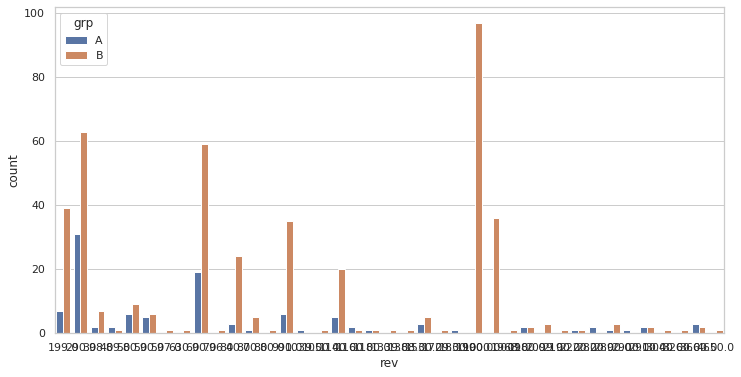

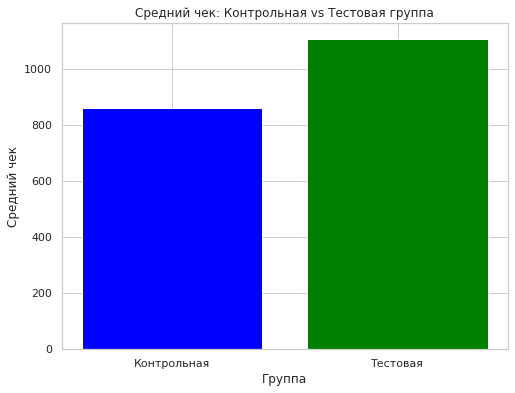

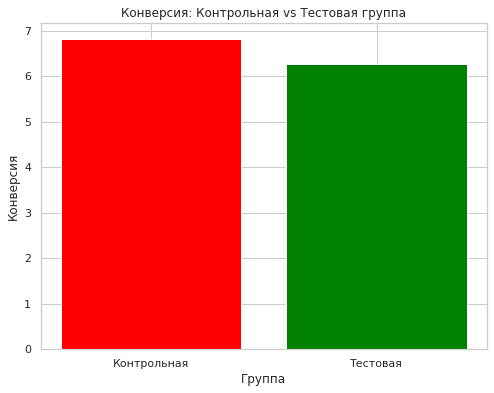

In [21]:
#Напишем функцию для построения графиков
def build_graphics(df, avr_group_a, avr_group_b, cr_a, cr_b):
    # Визуализируем выручку по нашим группам:
    sns.countplot(x = 'rev', data = df, hue="grp")
    sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")
    
    
    # Создание DataFrame с данными по среднему чеку
    data = {
        'Группа': ['Контрольная', 'Тестовая'],
        'Средний чек': [avr_group_a, avr_group_b]
    }

    df_avr_check = pd.DataFrame(data)

    # Создание графика
    plt.figure(figsize=(8, 6))

    # Список цветов для столбцов
    colors = ['blue', 'green']

    plt.bar(df_avr_check['Группа'], df_avr_check['Средний чек'], color=colors)
    # Добавление заголовка и меток осей
    plt.title('Средний чек: Контрольная vs Тестовая группа')
    plt.xlabel('Группа')
    plt.ylabel('Средний чек')

    # Отображение графика
    plt.show()
    
    
    
    # Создание DataFrame с данными по конверсии
    data_cr = {
        'Группа': ['Контрольная', 'Тестовая'],
        'Конверсия': [cr_a, cr_b]
    }

    df_cr = pd.DataFrame(data_cr)

    # Создание графика
    plt.figure(figsize=(8, 6))

    # Список цветов для столбцов
    colors = ['red', 'green']

    plt.bar(df_cr['Группа'], df_cr['Конверсия'], color=colors)
    # Добавление заголовка и меток осей
    plt.title('Конверсия: Контрольная vs Тестовая группа')
    plt.xlabel('Группа')
    plt.ylabel('Конверсия')

    # Отображение графика
    plt.show()
    
    
build_graphics(merged_df, metrics_a['avr_check'], metrics_b['avr_check'], metrics_a['cr'], metrics_b['cr'])

**Чтобы дополнительно проверить свои выводы посмотрим на статистику в наших группах, методом describe(), чтобы убедиться в правильности наших расчетов**

In [22]:
# Статистика контрольной группы
group_a.rev.describe()

count     107.000000
mean      860.710280
std       815.893445
min       199.000000
25%       290.000000
50%       690.000000
75%       990.000000
max      3660.000000
Name: rev, dtype: float64

In [23]:
# Статистика тестовой группы
group_b.rev.describe()

count     434.000000
mean     1108.824893
std       741.834304
min       199.000000
25%       420.750000
50%       935.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

## Однако, прежде чем делать вывод на основе полученных статистических данных об успешности нашего эксперимента, и предлагать принять новую форму оплаты на нашем сайте, необходимо проверить являются ли эти различия статистически значимыми ##

In [24]:
# Сначала проведем тест на нормальность распределения Шапиро-Уилка, чтобы понять, как в дальнейшем проверить значимость наших
# метрик:
# Если p-value меньше 0,05, то подтвердится ненормальность распределений, если p-value больше 0,05, то распределение нормальное.
# Делаем преподготовку файлов:
group_a_dropped = group_a['rev'].dropna()
group_b_dropped = group_b['rev'].dropna()
    
# Проверяем:
stats.shapiro(group_a_dropped), stats.shapiro(group_b_dropped)

(ShapiroResult(statistic=0.7196124196052551, pvalue=5.321687643507211e-13),
 ShapiroResult(statistic=0.8672363758087158, pvalue=8.947892893418603e-19))

**Мы увидели, что распределение в нашем случае ненормальное, т.к. pvalue значительно меньше 0,05, а значит, мы должны использовать непараметрический тест, например критерий Мана-Уитни для среднего чека, чтобы убедиться в статистической значимости полученных нами метрик.** 

In [25]:
# Напишем функцию для автоматичеcкого тестирования наших данных на статзначимость(используем критерий Мана-Уитни,
# Нулевая гипотеза будет заключаться в том, что средние значения среднего чека в обеих группах равны.)
# Если pvalue меньше 0,05, значит наши метрики статистически различаются между собой и мы можем сравнить наши группы A и B
# и прийти к определенным выводам.

def test_statistical_data(group_a, group_b):

    # Делаем преподготовку файлов:
    group_a_dropped = group_a['rev'].dropna()
    group_b_dropped = group_b['rev'].dropna()

    # Выполняем U-тест Манна-Уитни:
    from scipy.stats import mannwhitneyu
    statistic, p_value = mannwhitneyu(group_a_dropped, group_b_dropped)

    # Выводим результаты
    print("Статистика теста:", statistic)
    print("p-значение:", p_value)

    # Интерпретация результатов
    alpha = 0.05

    if p_value < alpha:
        print("Существуют статистически значимые различия между группами.")
    else:
        print("Нет статистически значимых различий между группами.")
        
test_statistical_data(group_a, group_b)

Статистика теста: 17862.0
p-значение: 0.00019316054996380152
Существуют статистически значимые различия между группами.


## Проведя тестирование на значимость различий результатов между нашей контрольной и тестовой группой, мы получили вывод: "Различия между выборками являются статистически значимыми", и это означает, что мы можем сравнивать наши результаты метрик между контрольной и тестовой группами и прийти к определенным выводам##
### Также мы можем убедиться в статзначимости наших результаттов анализа при помощи методов визуализации ###

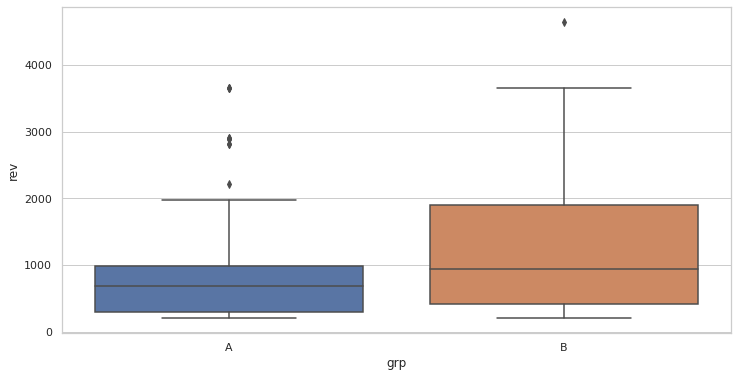

In [26]:
 sns.boxplot(data=merged_df, x="grp", y="rev")


### Судя по нашему боксплоту,  между нашими группами присутствуют значимые различия ###

## На основе предоставленных мне для анализа данных я пришла к следующим выводам:  
* Значимые различия между нашими контрольной и тестовой группами во время проведения эксперимента присутствуют, а значит,  можно признать данные для анализа объективными;
* Во время проведения эксперимента средний чек в тестовой группе был на **247 условных рублей** больше, чем в контрольной, и с этой точки зрения наш эксперимент можно считать удачным.
* Однако конверсия в тестовой группе на **0,56 пп.** ниже чем в контрольной, и поэтому сказать, что эксперимент можно признать однозначно удачным - нельзя.
* 
**Т.к. результаты наших метрик носят разнонаправленный характер, мои рекомендации будут следующими:**  
* а.) Если при тестировании новой механики оплат для нашей компании важна **конверсия в покупку,**  т.е. как можно большее количество пользователей должно оплачивать наши услуги, то **я не рекомендую раскатывать нашу новую механику оплат,** т.к. ее конверсия ниже, по сравнению с конверсией предыдущей версии оплат на **0,56 пп.**,  
* б.) Если при тестировании новой механики оплат для нашей компании важно увеличение **среднего чека**, то **я могу рекомендовать раскатить нашу новую механику оплат,** т.к. средний чек вырос на 247 рублей,  
* в.) Если же при тестировании новой механики оплат для нашей компании **важны оба этих показателя - и средний чек и конверсия**, то **я могу рекомендовать продолжить эксперимент до получения более однозначных выводов.**
 

# Задание 2. SQL
## 2.1 Очень усердные ученики.

### 2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

### 2.1.2 Задача

Дана таблица default.peas 

## ! Все данные находятся в табличном виде в ClickHouse 

### Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

### Решение (можно проверить в QlickHouse): ###
    
   ```SELECT COUNT(*) AS student_count  
FROM (  
    SELECT st_id, COUNT(*) AS task_count  
    FROM default.peas  
    WHERE toDate(timest) >= toStartOfMonth(now()) AND toDate(timest) < toStartOfMonth(now()) + INTERVAL 1 MONTH  
    AND correct = 1  
    GROUP BY st_id  
    HAVING COUNT(*) >= 20  
) AS subquery```


***Проверочный код для даты указанной в таблице default.peas:***  
```SELECT COUNT(*) AS student_count
FROM (
    SELECT st_id, COUNT(*) AS task_count
    FROM default.peas
    WHERE toDate(timest) >= toStartOfMonth(toDate('2021-10-30')) AND toDate(timest) < toStartOfMonth(toDate('2021-10-30')) + INTERVAL 1 MONTH
    AND correct = 1
    GROUP BY st_id
    HAVING COUNT(*) >= 20
) AS subquery```



## 2.2 Оптимизация воронки

### 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

### 2.2.2 Задача

Даны таблицы: default.peas, default.studs и default.final_project_check:

## ! Все данные находятся в табличном виде в ClickHouse 


### Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

### ARPU 
### ARPAU
### CR в покупку 
### СR активного пользователя в покупку 
### CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике (***не совсем верное название предмета, корректное примение согласно базы : subject = ’Math’***)

### ARPU считается относительно всех пользователей, попавших в группы.

### Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

### Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.



### Решение (можно проверить в QlickHouse): ###
```
--Находим количество активных пользователей по математике и их купленное количество курсов
WITH math_purchase AS (
SELECT st_id,
MAX(CASE WHEN subject = 'Math' THEN 1 ELSE 0 END) AS all_math_purchase,
SUM(money) AS all_income
FROM default.final_project_check
GROUP BY st_id
),
math_tasks AS (
SELECT st_id,
SUM(CASE WHEN subject = 'Math' THEN 1 ELSE 0 END) AS math_users,
SUM(correct) AS all_tasks
FROM peas
WHERE correct = 1
GROUP BY st_id
HAVING math_users >= 2 OR all_tasks > 10
)
--Вычисляем необходимые нам метрики, с округлением до 2 знаков:
SELECT test_grp,
ROUND(SUM(all_income) / COUNT(studs.st_id), 2) AS ARPU,
ROUND(sumIf(all_income, active_users=1) / SUM(active_users), 2) as ARPAU,
ROUND(SUM(total_incom) / COUNT(studs.st_id), 2) AS CR_Purchase,
ROUND(SUM(CASE WHEN active_users > 0 THEN total_incom ELSE 0 END) / SUM(active_users), 2) AS CR_Active_User,
ROUND(SUM(CASE WHEN all_math_purchase = 1 AND active_math_users = 1 THEN 1 ELSE 0 END) / SUM(active_math_users), 2) AS CR_Math_Purchase
--Производим слияние данных всех студентов по группам
FROM (
SELECT studs.st_id,
test_grp,
all_income,
all_math_purchase,
CASE WHEN math_users >= 2 THEN 1 ELSE 0 END AS active_math_users,
CASE WHEN all_tasks > 10 THEN 1 ELSE 0 END AS active_users,
CASE WHEN all_income > 0 THEN 1 ELSE 0 END AS total_incom
FROM default.studs
LEFT JOIN math_purchase ON studs.st_id = math_purchase.st_id
LEFT JOIN math_tasks ON studs.st_id = math_tasks.st_id
)
GROUP BY test_grp```

# Задание 3. Python

## 3.1 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

## 3.2 Задача

Реализуйте функцию, которая будет строить графики по получаемым метрикам

## Решение:




In [27]:
# Пишу общую функцию, которая обновит наши базы, пересчитает метрики и отстроит графики по пересчитанным метрикам
# Так как новая добавленная база не предоставлена, функцию вызывать не будем, только реализуем

def update_metrics(users_grouped_new):
    # Добавляем к нашей актуальной базе юзеров новый файл
    global users_grouped_actual
    users_grouped_actual = concat_tables(users_grouped_actual, users_grouped_new)
    
    merged_df = merge_dfs(users_grouped_actual, users_visited, users_payed)
    metrics = get_metrics(merged_df)
    print(metrics)
    
    group_a = merged_df[merged_df['grp'] == 'A']
    metrics_a = get_metrics(group_a)
    
    group_b = merged_df[merged_df['grp'] == 'B']
    metrics_b = get_metrics(group_b)
    
    # Функция для построения графиков реализована в первой части задания, поэтому здесь мы просто ее визуализируем
    build_graphics(merged_df, metrics_a['avr_check'], metrics_b['avr_check'], metrics_a['cr'], metrics_b['cr'])

    # Пересчитаем заново нашу значимость, после обновления данных
    test_statistical_data(group_a, group_b)